# Linear Regression



# Model Representation

Similar to Simple Linear Regression, we have input variable(**X**) and output variable(**Y**). But the input variable has \\(n\\) features. Therefore, we can represent this linear model as follows;

\\[Y = \beta_0 + \beta_1x_1 + \beta_1x_2 + ... + \beta_nx_n\\]

\\(x_i\\) is the i<sup>th</sup> feature in input variable. By introducing \\(x_0 = 1\\), we can rewrite this equation.

\\[Y = \beta_0x_0 + \beta_1x_1 + \beta_1x_2 + ... + \beta_nx_n\\]

\\[x_0 = 1\\]

Now we can convert this eqaution to matrix form.

\\[Y = \beta^TX\\]

Where,

\\[\beta = \begin{bmatrix}\beta_0\\\beta_1\\\beta_2\\.\\.\\\beta_n\end{bmatrix}\\]

and

\\[X = \begin{bmatrix}x_0\\x_1\\x_2\\.\\.\\x_n\end{bmatrix}\\]

We have to define the cost of the model. Cost bascially gives the error in our model. **Y** in above equation is the our hypothesis(approximation). We are going to define it as our hypothesis function.

\\[h_\beta(x) = \beta^Tx\\]

And the cost is,

\\[J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{\textrm{(i)}}) - y^{\textrm{(i)}})^2\\]

By minimizing this cost function, we can get find \\(\beta\\). We use **Gradient Descent** for this.

## Gradient Descent

Gradient Descent is an optimization algorithm. We will optimize our cost function using Gradient Descent Algorithm.


### Step 1
Initialize values \\(\beta_0\\), \\(\beta_1\\),..., \\(\beta_n\\) with some value. In this case we will initialize with 0 or random number.

### Step 2

Iteratively update,

\\[\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)\\]

until it converges.

This is the procedure. Here \\(\alpha\\) is the learning rate. This operation \\(\frac{\partial}{\partial \beta_j} J(\beta)\\) means we are finding partial derivate of cost with respect to each \\(\beta_j\\). This is called Gradient.


In step 2 we are changing the values of \\(\beta_j\\) in a direction in which it reduces our cost function. And Gradient gives the direction in which we want to move. Finally we will reach the minima of our cost function. But we don't want to change values of \\(\beta_j\\) drastically, because we might miss the minima. That's why we need learning rate.

![Gradient Descent](https://i.imgur.com/xnPvEok.gif)

The above animation illustrates the Gradient Descent method.

But we still didn't find the value of \\(\frac{\partial}{\partial \beta_j} J(\beta)\\). After we applying the mathematics. The step 2 becomes.

\\[\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}\\]

We iteratively change values of \\(\beta_j\\) according to above equation. This particular method is called **Batch Gradient Descent**.

## Simple Linear Regression

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [12]:
dataset = pd.read_csv('homeprices.csv')

In [548]:
X = np.array(dataset['area'] * 0.001)
y = np.array(dataset['price'] * 0.001)

In [549]:
def Loss(X,y,w,b):
    M=len(y)
    loss=sum(0.5*(x*w+b-y[i])**2 for i,x in enumerate(X))/M
    return loss

def gradL(X,y,w,b):
    M=len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

In [550]:
a = 0.012
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Loss at iter10000=93.40753424657561
coef: 135.78767210723962
intercept: 135.78767210723962


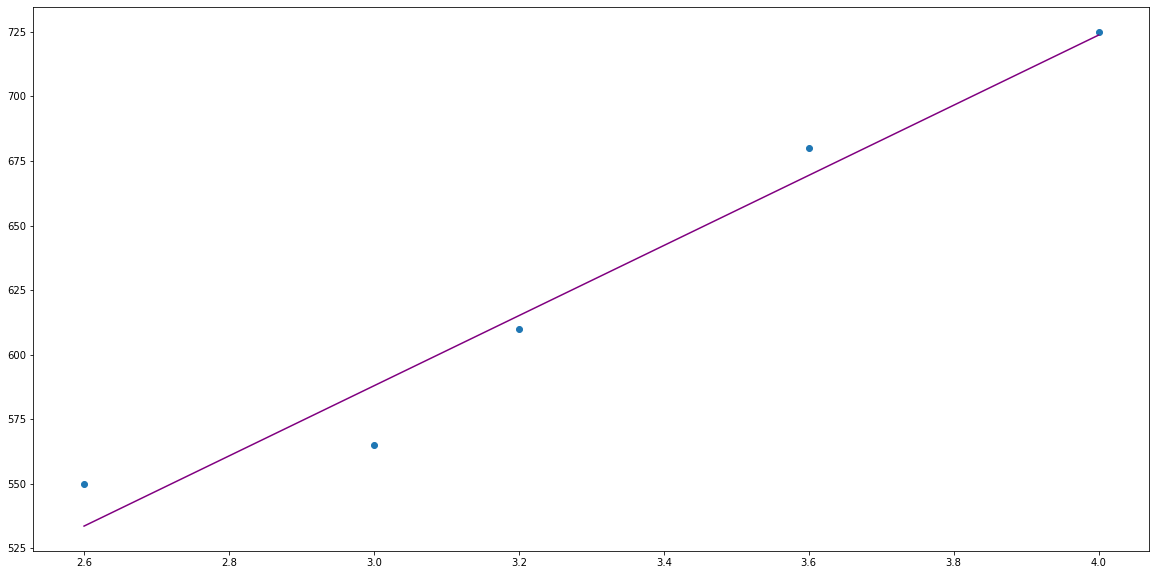

In [561]:
for i in range(10001):
    dw,db=gradL(X,y,w,b)
    w=w-a*dw
    b=b-a*db
    L=Loss(X,y,w,b)
    if i == 10000:
        print(f'Loss at iter{i}={L}')
        print('coef:', w)
        print('intercept:', w)
        plt.plot(X,[w*x + b for x in X], color = 'purple')  
plt.scatter(X,y)
    

## Use scikit-learn approach
[scikit-learn](http://scikit-learn.org/) is simple machine learning library in Python. Building Machine Learning models are very easy using scikit-learn. Let's see how we can build this Simple Linear Regression Model using scikit-learn.

In [528]:
from sklearn import linear_model

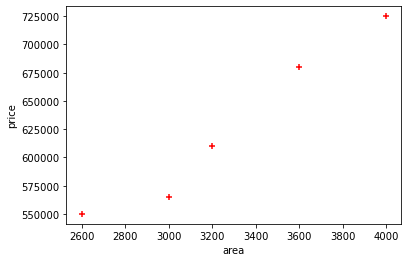

In [529]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(X,y,color='red',marker='+')

In [530]:
X = np.array(X)
X = X.reshape(len(X),1)

In [531]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [532]:
reg.predict([[3300]])

array([628715.75342466])

In [533]:
reg.coef_

array([135.78767123])

In [534]:
reg.intercept_

180616.43835616432

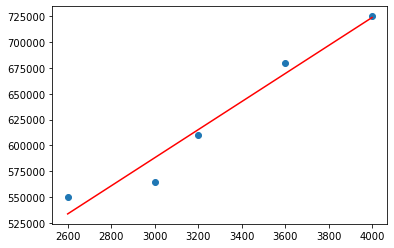

In [535]:
plt.plot(X,[reg.coef_ * x + reg.intercept_ for x in X],label=f'iter {i}',color=colors[i])  
plt.scatter(X,y)

# Multiple Linear Regression

Multiple Linear Regression is a type of Linear Regression when the input has multiple features(variables).

In [536]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [537]:
data = pd.read_csv('kc_house_data.csv')
data.head()
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [538]:
bedrooms = data['bedrooms'].values
bathrooms = data['bathrooms'].values
sqft_living = data['sqft_living'].values
sqft_lot = data['sqft_lot'].values
floors = data['floors'].values
waterfront = data['waterfront'].values
view = data['view'].values
condition = data['condition'].values
grade = data['grade'].values
sqft_above = data['sqft_above'].values
sqft_basement = data['sqft_basement'].values
yr_built = data['yr_built'].values
yr_renovated = data['yr_renovated'].values
zipcode = data['zipcode'].values
lat = data['lat'].values
long = data['long'].values
sqft_living15 = data['sqft_living15'].values
sqft_lot15 = data['sqft_lot15'].values
price = data['price'].values

In [539]:
m = len(bedrooms)
x0 = np.ones(m)
X = np.array([x0, bedrooms, bathrooms]).T
Y = np.array(price)
# Initial Coefficients
B = np.array([0]*3)
alpha = 0.02

In [540]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [541]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

213235671551.19766


In [542]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [543]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-30642.99594889  20138.26578118 237780.5850233 ]
48675786970.77449


In [544]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

312012.13749075355
0.27767947402283366


## Using scikit-learn Approach

scikit-learn approach is very similar to Simple Linear Regression Model and simple too. Let's implement this.

In [545]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y
X = np.array([bedrooms, bathrooms, sqft_living,
       sqft_lot, floors, waterfront, view, condition, grade,
       sqft_above, sqft_basement, yr_built, yr_renovated, zipcode,
       lat, long, sqft_living15, sqft_lot15]).T
Y = np.array(price)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print('rmse:', rmse)
print('regression score:', r2)
print('coefficient:',reg.coef_)
print('intercept:',reg.intercept_)

rmse: 201163.90222277152
regression score: 0.6997471890109157
coefficient: [-3.57665414e+04  4.11442785e+04  1.10442865e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852244e+01  3.96576400e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]
intercept: 6690324.603099499
